# 1. EDA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)
pd.set_option('precision', 4)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import kendalltau, pearsonr, spearmanr
import pingouin as pg
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,...,130,mpfi,3.47,2.68,9.00000,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,...,130,mpfi,3.47,2.68,9.00000,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50000,...,152,mpfi,2.68,3.47,9.00000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80000,...,109,mpfi,3.19,3.4,10.00000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40000,...,136,mpfi,3.19,3.4,8.00000,115,5500,18,22,17450


In [3]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [4]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

C:\Users\ngocdinh1410\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.9.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000,205.00000
mean,0.83415,98.75659,174.04927,65.90780,53.72488,2555.56585,126.90732,10.14254,25.21951,30.75122
std,1.24531,6.02178,12.33729,2.14520,2.44352,520.68020,41.64269,3.97204,6.54214,6.88644
min,-2.00000,86.60000,141.10000,60.30000,47.80000,1488.00000,61.00000,7.00000,13.00000,16.00000
25%,0.00000,94.50000,166.30000,64.10000,52.00000,2145.00000,97.00000,8.60000,19.00000,25.00000
50%,1.00000,97.00000,173.20000,65.50000,54.10000,2414.00000,120.00000,9.00000,24.00000,30.00000
75%,2.00000,102.40000,183.10000,66.90000,55.50000,2935.00000,141.00000,9.40000,30.00000,34.00000
max,3.00000,120.90000,208.10000,72.30000,59.80000,4066.00000,326.00000,23.00000,49.00000,54.00000


In [8]:
df_2 = pd.read_csv('Automobile_data.csv')
df_2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,...,130,mpfi,3.47,2.68,9.00000,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60000,...,130,mpfi,3.47,2.68,9.00000,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50000,...,152,mpfi,2.68,3.47,9.00000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.80000,...,109,mpfi,3.19,3.4,10.00000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.40000,...,136,mpfi,3.19,3.4,8.00000,115,5500,18,22,17450


In [9]:
df_num_2=df_2[['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']]

In [10]:
df_num_2

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,88.60000,168.80000,64.10000,48.80000,2548,130,3.47,2.68,9.00000,111,5000,21,27,13495
1,3,?,88.60000,168.80000,64.10000,48.80000,2548,130,3.47,2.68,9.00000,111,5000,21,27,16500
2,1,?,94.50000,171.20000,65.50000,52.40000,2823,152,2.68,3.47,9.00000,154,5000,19,26,16500
3,2,164,99.80000,176.60000,66.20000,54.30000,2337,109,3.19,3.4,10.00000,102,5500,24,30,13950
4,2,164,99.40000,176.60000,66.40000,54.30000,2824,136,3.19,3.4,8.00000,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.10000,188.80000,68.90000,55.50000,2952,141,3.78,3.15,9.50000,114,5400,23,28,16845
201,-1,95,109.10000,188.80000,68.80000,55.50000,3049,141,3.78,3.15,8.70000,160,5300,19,25,19045
202,-1,95,109.10000,188.80000,68.90000,55.50000,3012,173,3.58,2.87,8.80000,134,5500,18,23,21485
203,-1,95,109.10000,188.80000,68.90000,55.50000,3217,145,3.01,3.4,23.00000,106,4800,26,27,22470


In [11]:
def clean_function(df):
    df_clean=df.copy()
    int_col=['horsepower','price']
    float_col=['peak-rpm','stroke','bore']
    for col in int_col:
        if col in df_clean.columns:
            a=df_clean[df_clean[col]!='?']
            b=(a[col].astype(int)).mean()
            df_clean[col]=df_clean[col].replace('?',b).astype(int)
    for col in float_col:
        if col in df_clean.columns:
            a=df_clean[df_clean[col]!='?']
            b=(a[col].astype(float)).mean()
            df_clean[col]=df_clean[col].replace('?',b).astype(float)
    return df_clean
df_cars_cleaned=clean_function(df_num_2)
df_cars_cleaned

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,9.00000,111,5000.00000,21,27,13495
1,3,?,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,9.00000,111,5000.00000,21,27,16500
2,1,?,94.50000,171.20000,65.50000,52.40000,2823,152,2.68000,3.47000,9.00000,154,5000.00000,19,26,16500
3,2,164,99.80000,176.60000,66.20000,54.30000,2337,109,3.19000,3.40000,10.00000,102,5500.00000,24,30,13950
4,2,164,99.40000,176.60000,66.40000,54.30000,2824,136,3.19000,3.40000,8.00000,115,5500.00000,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.10000,188.80000,68.90000,55.50000,2952,141,3.78000,3.15000,9.50000,114,5400.00000,23,28,16845
201,-1,95,109.10000,188.80000,68.80000,55.50000,3049,141,3.78000,3.15000,8.70000,160,5300.00000,19,25,19045
202,-1,95,109.10000,188.80000,68.90000,55.50000,3012,173,3.58000,2.87000,8.80000,134,5500.00000,18,23,21485
203,-1,95,109.10000,188.80000,68.90000,55.50000,3217,145,3.01000,3.40000,23.00000,106,4800.00000,26,27,22470


In [12]:
df_cars_cleaned['normalized-losses']=df_cars_cleaned['normalized-losses'].replace("?",np.nan)

In [13]:
df_3=df_cars_cleaned.join(df, how='left',lsuffix='_left',rsuffix='_right')
df_3.head()

,symboling_left,normalized-losses_left,wheel-base_left,length_left,width_left,height_left,curb-weight_left,engine-size_left,bore_left,stroke_left,...,engine-size_right,fuel-system,bore_right,stroke_right,compression-ratio_right,horsepower_right,peak-rpm_right,city-mpg_right,highway-mpg_right,price_right
0,3,NaN,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,...,130,mpfi,3.47,2.68,9.00000,111,5000,21,27,13495
1,3,NaN,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,...,130,mpfi,3.47,2.68,9.00000,111,5000,21,27,16500
2,1,NaN,94.50000,171.20000,65.50000,52.40000,2823,152,2.68000,3.47000,...,152,mpfi,2.68,3.47,9.00000,154,5000,19,26,16500
3,2,164,99.80000,176.60000,66.20000,54.30000,2337,109,3.19000,3.40000,...,109,mpfi,3.19,3.4,10.00000,102,5500,24,30,13950
4,2,164,99.40000,176.60000,66.40000,54.30000,2824,136,3.19000,3.40000,...,136,mpfi,3.19,3.4,8.00000,115,5500,18,22,17450


In [14]:
df_3['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

In [15]:
df_3['num-of-doors']=df_3['num-of-doors'].replace('?','four')
df_3['num-of-doors'].value_counts()

four    116
two      89
Name: num-of-doors, dtype: int64

In [164]:
df_3.columns

Index(['symboling_left', 'normalized-losses_left', 'wheel-base_left',
       'length_left', 'width_left', 'height_left', 'curb-weight_left',
       'engine-size_left', 'bore_left', 'stroke_left',
       'compression-ratio_left', 'horsepower_left', 'peak-rpm_left',
       'city-mpg_left', 'highway-mpg_left', 'price_left', 'symboling_right',
       'normalized-losses_right', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base_right', 'length_right', 'width_right', 'height_right',
       'curb-weight_right', 'engine-type', 'num-of-cylinders',
       'engine-size_right', 'fuel-system', 'bore_right', 'stroke_right',
       'compression-ratio_right', 'horsepower_right', 'peak-rpm_right',
       'city-mpg_right', 'highway-mpg_right', 'price_right'],
      dtype='object')

In [165]:
df_3=df_3[['symboling_left', 'normalized-losses_left', 'wheel-base_left',
       'length_left', 'width_left', 'height_left', 'curb-weight_left',
       'engine-size_left', 'bore_left', 'stroke_left',
       'compression-ratio_left', 'horsepower_left', 'peak-rpm_left',
       'city-mpg_left', 'highway-mpg_left', 'price_left', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']]

In [169]:
df_3['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [16]:
df_3.dtypes

symboling_left               int64
normalized-losses_left      object
wheel-base_left            float64
length_left                float64
width_left                 float64
height_left                float64
curb-weight_left             int64
engine-size_left             int64
bore_left                  float64
stroke_left                float64
compression-ratio_left     float64
horsepower_left              int32
peak-rpm_left              float64
city-mpg_left                int64
highway-mpg_left             int64
price_left                   int32
symboling_right              int64
normalized-losses_right     object
make                        object
fuel-type                   object
aspiration                  object
num-of-doors                object
body-style                  object
drive-wheels                object
engine-location             object
wheel-base_right           float64
length_right               float64
width_right                float64
height_right        

In [17]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling_left,205.00000,0.83415,1.24531,-2.00000,0.00000,1.00000,2.00000,3.00000
wheel-base_left,205.00000,98.75659,6.02178,86.60000,94.50000,97.00000,102.40000,120.90000
length_left,205.00000,174.04927,12.33729,141.10000,166.30000,173.20000,183.10000,208.10000
width_left,205.00000,65.90780,2.14520,60.30000,64.10000,65.50000,66.90000,72.30000
height_left,205.00000,53.72488,2.44352,47.80000,52.00000,54.10000,55.50000,59.80000
curb-weight_left,205.00000,2555.56585,520.68020,1488.00000,2145.00000,2414.00000,2935.00000,4066.00000
engine-size_left,205.00000,126.90732,41.64269,61.00000,97.00000,120.00000,141.00000,326.00000
bore_left,205.00000,3.32975,0.27084,2.54000,3.15000,3.31000,3.58000,3.94000
stroke_left,205.00000,3.25542,0.31360,2.07000,3.11000,3.29000,3.41000,4.17000
compression-ratio_left,205.00000,10.14254,3.97204,7.00000,8.60000,9.00000,9.40000,23.00000


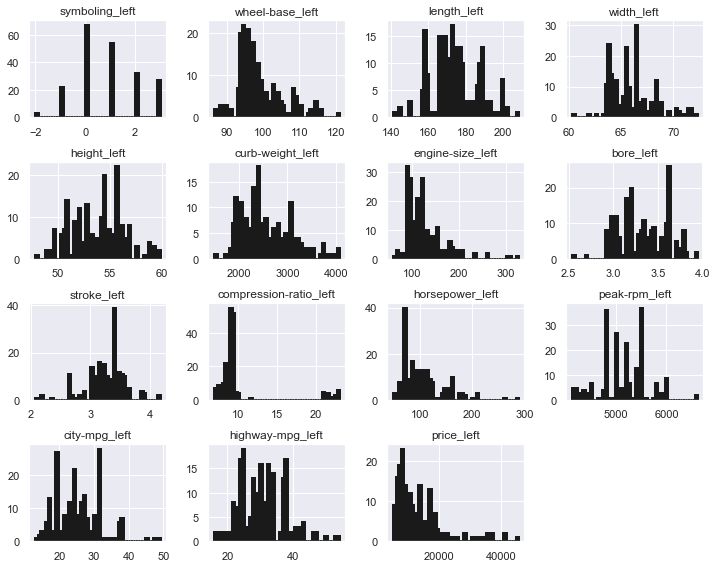

In [171]:
df_3[['symboling_left', 'normalized-losses_left', 'wheel-base_left',
       'length_left', 'width_left', 'height_left', 'curb-weight_left',
       'engine-size_left', 'bore_left', 'stroke_left',
       'compression-ratio_left', 'horsepower_left', 'peak-rpm_left',
       'city-mpg_left', 'highway-mpg_left', 'price_left']].hist(figsize=(10,8),bins=50,color='b',linewidth='3',edgecolor='k')
plt.tight_layout()
plt.show()

We can already tell by the describe fucntion that there's some skew to the data. However, this series of histogram provides better overview of the numeric data in the dataset. 
<p> Data that's very skewed:
    <li>compression-ratio
        <li>horsepower
            <li>price
                <li>engine-size
                    <li>wheel-base

# 2. EDA

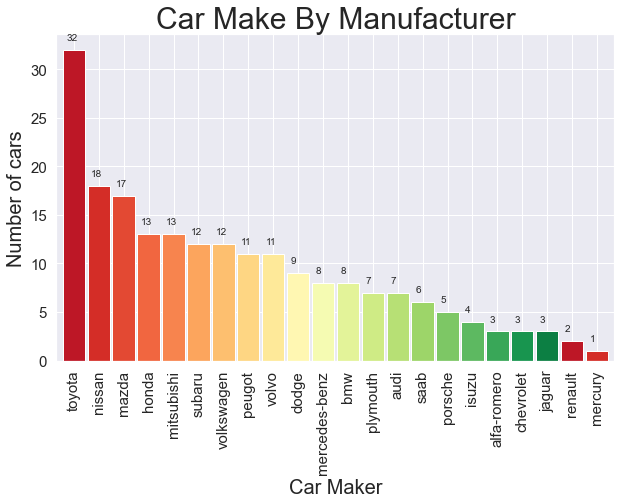

In [94]:
plt.subplots(figsize=(10,6))
ax=df_3['make'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of cars',fontsize=20)
plt.title('Car Make By Manufacturer',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()
plt.show()

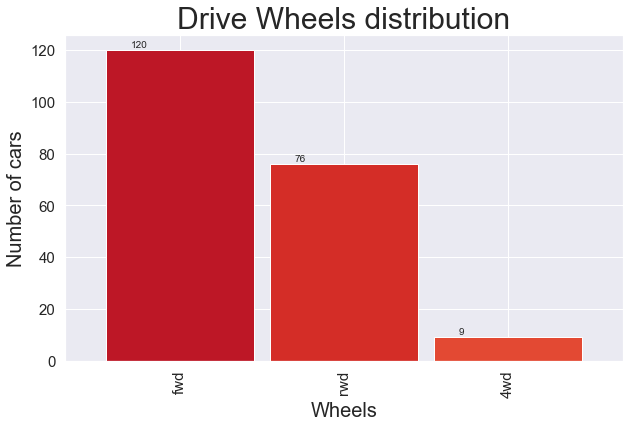

In [95]:
plt.subplots(figsize=(10,6))
ax=df_3['drive-wheels'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation='vertical')
plt.xlabel('Wheels',fontsize=20)
plt.ylabel('Number of cars',fontsize=20)
plt.title('Drive Wheels distribution',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()
plt.show()

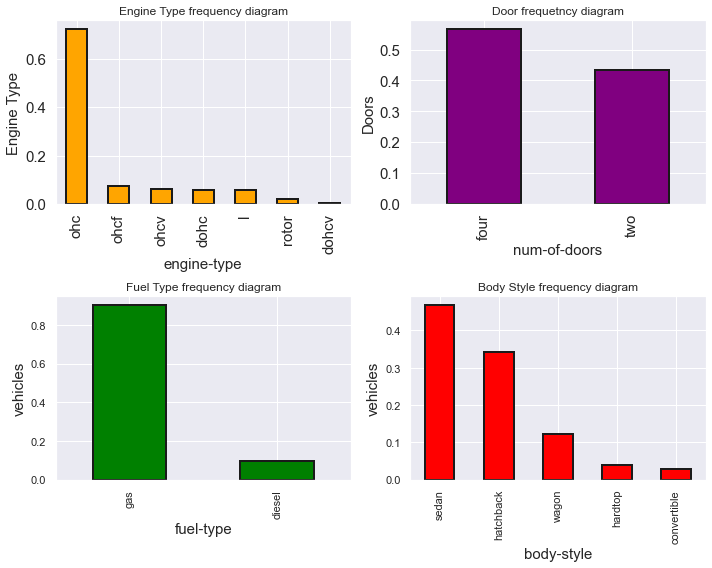

In [97]:
plt.figure(1)
plt.subplot(221)
ax1=df_3['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange',edgecolor='k',linewidth=2)
plt.title("Engine Type frequency diagram")
plt.ylabel('Engine Type',fontsize=15)
ax1.tick_params(labelsize=15)
plt.xlabel('engine-type',fontsize=15);


plt.subplot(222)
ax2=df_3['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='purple',edgecolor='k',linewidth=2)
plt.title("Door frequetncy diagram")
plt.ylabel('Doors',fontsize=15)
ax2.tick_params(labelsize=15)
plt.xlabel('num-of-doors',fontsize=15);

plt.subplot(223)
ax3=df_3['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='green',edgecolor='k',linewidth=2)
plt.title("Fuel Type frequency diagram")
plt.ylabel('vehicles',fontsize=15)
plt.xlabel('fuel-type',fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplot(224)
ax4=df_3['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red',edgecolor='k',linewidth=2)
plt.title("Body Style frequency diagram")
plt.ylabel('vehicles',fontsize=15)
plt.xlabel('body-style',fontsize=15);
plt.tight_layout()
plt.show()


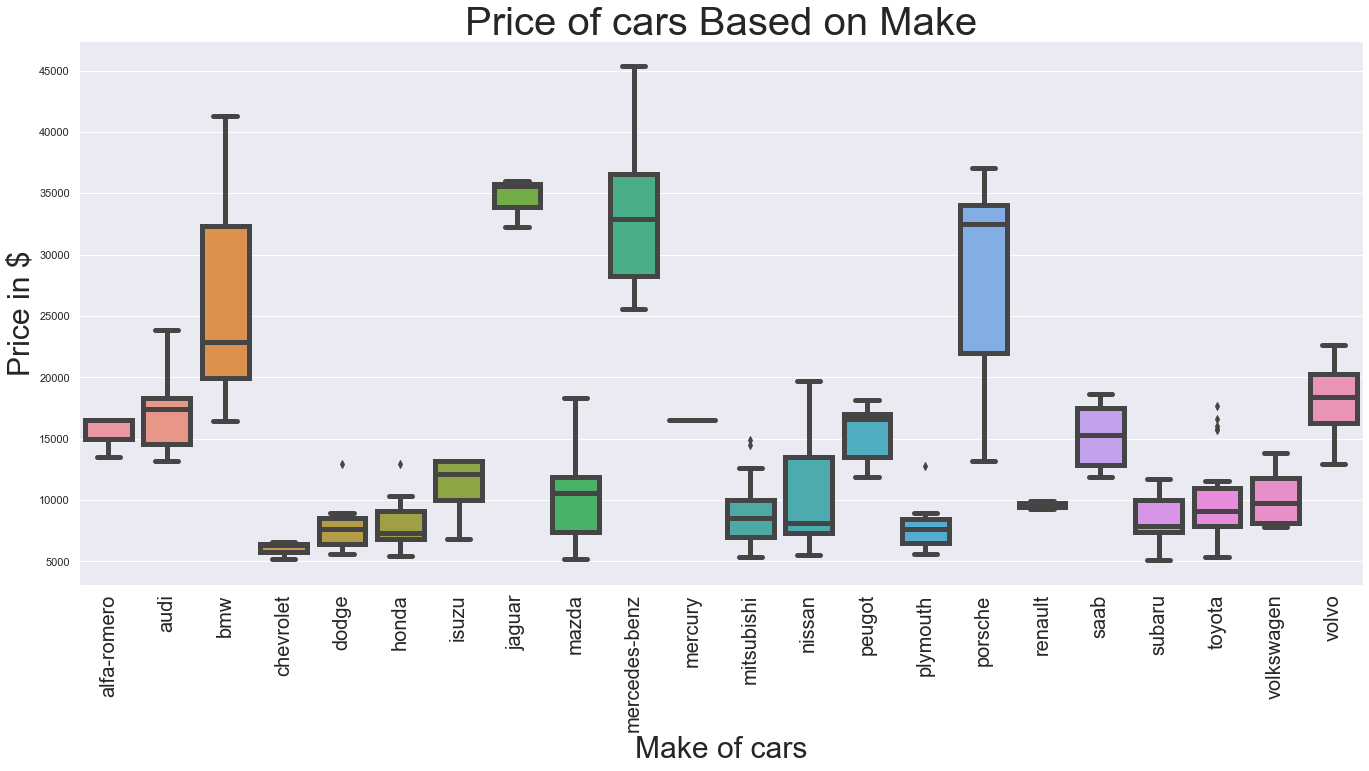

In [101]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price_left", data=df_3,width=0.8,linewidth=5)
ax.set_xlabel('Make of cars',fontsize=30)
ax.set_ylabel('Price in $',fontsize=30)
plt.title('Price of cars Based on Make',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

This gives an oversight of the price of cars based on make.

<li>Low-priced cars: renault, toyota, subaru, volkswagen, chevrolet....
    <li> high-priced brands: bmw, benz, porsche

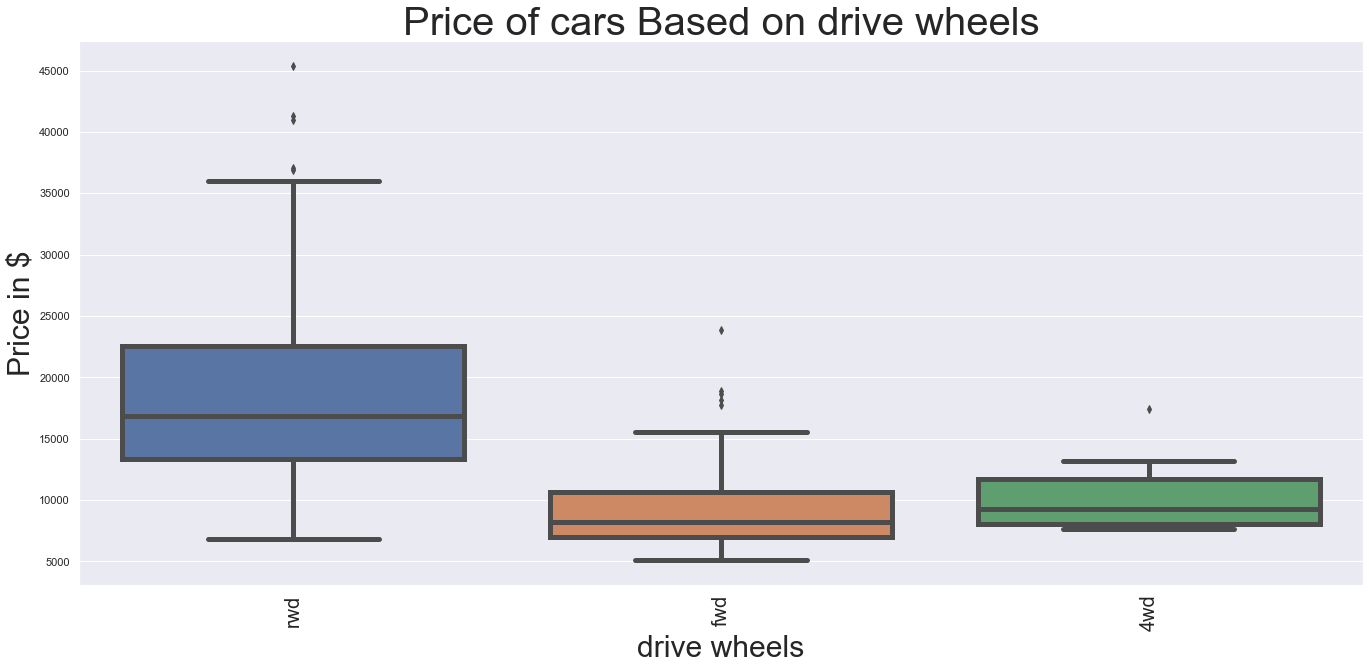

In [102]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="drive-wheels", y="price_left", data=df_3,width=0.8,linewidth=5)
ax.set_xlabel('drive wheels',fontsize=30)
ax.set_ylabel('Price in $',fontsize=30)
plt.title('Price of cars Based on drive wheels',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

FWD and 4wd had siginficantly lower box plot compare to rwd. 

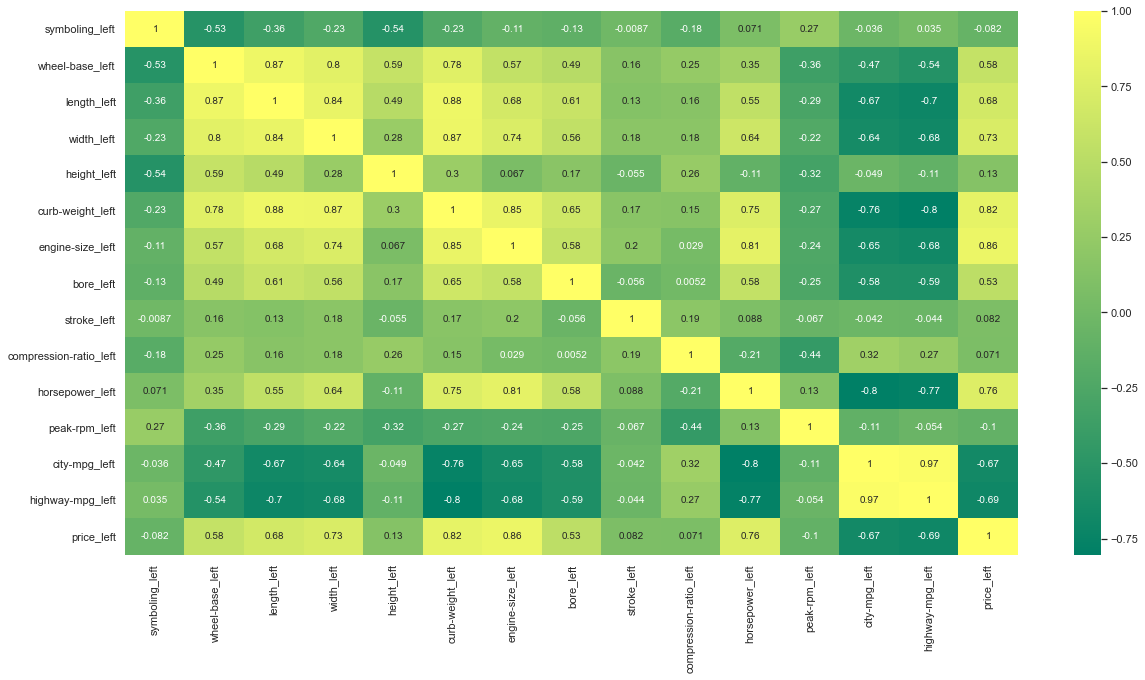

In [172]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df_3.corr(),annot=True,cmap='summer');

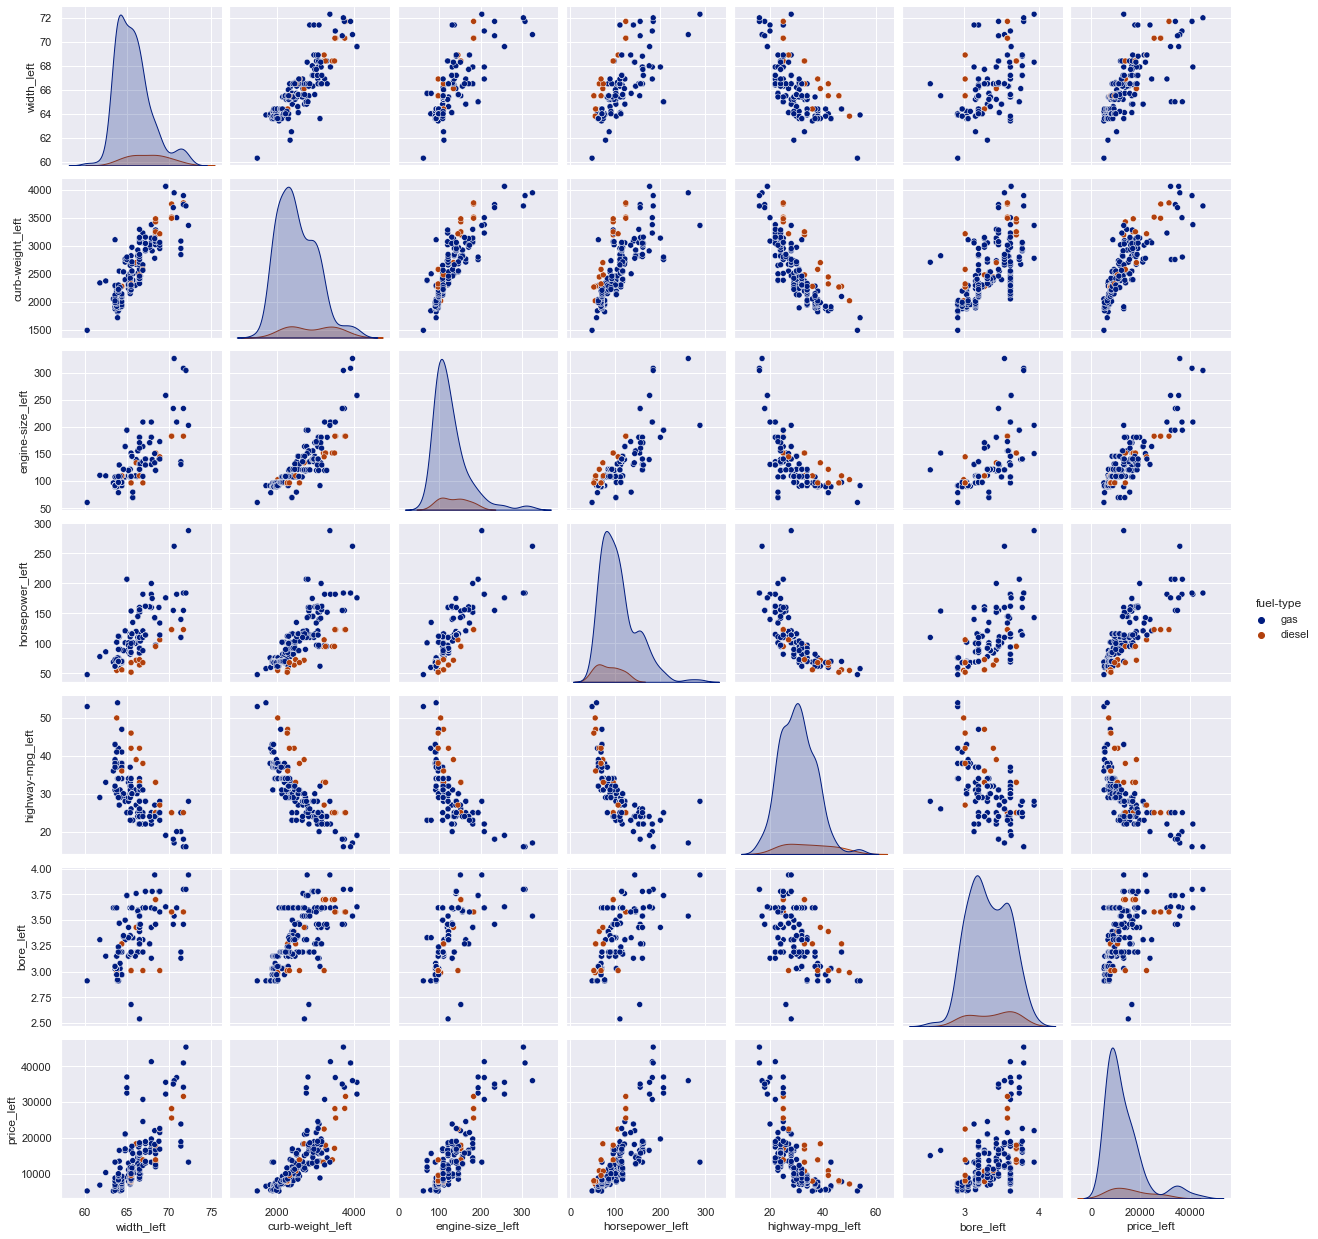

In [173]:
ax = sns.pairplot(df_3[["width_left", "curb-weight_left","engine-size_left","horsepower_left","highway-mpg_left","fuel-type","bore_left","price_left",]], hue="fuel-type",palette='dark') #diag_kind="hist"

# 3 Normalization

These numeric data are also of different scales. Some from 1-10, 100-1000, 10,000 to 100,000. To run regression it is best that this dataset be normalized.

In [18]:
normalize = ['wheel-base_left','engine-size_left','bore_left','compression-ratio_left','horsepower_left','price_left']

norm_df = df_3[normalize]
norm_df

,wheel-base_left,engine-size_left,bore_left,compression-ratio_left,horsepower_left,price_left
0,88.60000,130,3.47000,9.00000,111,13495
1,88.60000,130,3.47000,9.00000,111,16500
2,94.50000,152,2.68000,9.00000,154,16500
3,99.80000,109,3.19000,10.00000,102,13950
4,99.40000,136,3.19000,8.00000,115,17450
...,...,...,...,...,...,...
200,109.10000,141,3.78000,9.50000,114,16845
201,109.10000,141,3.78000,8.70000,160,19045
202,109.10000,173,3.58000,8.80000,134,21485
203,109.10000,145,3.01000,23.00000,106,22470


In [19]:
# apply the robust scaling in Pandas using the .median() and .quantile() methods
def robust_scaling(df):
    # copy the dataframe
    df_robust = df.copy()
    # apply robust scaling
    for column in df_robust.columns:
        df_robust[column] = (df_robust[column] - df_robust[column].median())  / (df_robust[column].quantile(0.75) - df_robust[column].quantile(0.25))
    return df_robust
    
# call the robust_scaling function
df_cars_robust = robust_scaling(norm_df)

df_cars_robust

,wheel-base_left,engine-size_left,bore_left,compression-ratio_left,horsepower_left,price_left
0,-1.06329,0.22727,0.37209,0.00000,0.34783,0.33287
1,-1.06329,0.22727,0.37209,0.00000,0.34783,0.67780
2,-0.31646,0.72727,-1.46512,0.00000,1.28261,0.67780
3,0.35443,-0.25000,-0.27907,1.25000,0.15217,0.38510
4,0.30380,0.36364,-0.27907,-1.25000,0.43478,0.78685
...,...,...,...,...,...,...
200,1.53165,0.47727,1.09302,0.62500,0.41304,0.71740
201,1.53165,0.47727,1.09302,-0.37500,1.41304,0.96993
202,1.53165,1.20455,0.62791,-0.25000,0.84783,1.25000
203,1.53165,0.56818,-0.69767,17.50000,0.23913,1.36306


In [20]:
df_4=df_3.join(df_cars_robust, how='left',rsuffix='_normalized')
df_4.head()

,symboling_left,normalized-losses_left,wheel-base_left,length_left,width_left,height_left,curb-weight_left,engine-size_left,bore_left,stroke_left,...,peak-rpm_right,city-mpg_right,highway-mpg_right,price_right,wheel-base_left_normalized,engine-size_left_normalized,bore_left_normalized,compression-ratio_left_normalized,horsepower_left_normalized,price_left_normalized
0,3,NaN,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,...,5000,21,27,13495,-1.06329,0.22727,0.37209,0.00000,0.34783,0.33287
1,3,NaN,88.60000,168.80000,64.10000,48.80000,2548,130,3.47000,2.68000,...,5000,21,27,16500,-1.06329,0.22727,0.37209,0.00000,0.34783,0.67780
2,1,NaN,94.50000,171.20000,65.50000,52.40000,2823,152,2.68000,3.47000,...,5000,19,26,16500,-0.31646,0.72727,-1.46512,0.00000,1.28261,0.67780
3,2,164,99.80000,176.60000,66.20000,54.30000,2337,109,3.19000,3.40000,...,5500,24,30,13950,0.35443,-0.25000,-0.27907,1.25000,0.15217,0.38510
4,2,164,99.40000,176.60000,66.40000,54.30000,2824,136,3.19000,3.40000,...,5500,18,22,17450,0.30380,0.36364,-0.27907,-1.25000,0.43478,0.78685


In [21]:
df_4.columns

Index(['symboling_left', 'normalized-losses_left', 'wheel-base_left',
       'length_left', 'width_left', 'height_left', 'curb-weight_left',
       'engine-size_left', 'bore_left', 'stroke_left',
       'compression-ratio_left', 'horsepower_left', 'peak-rpm_left',
       'city-mpg_left', 'highway-mpg_left', 'price_left', 'symboling_right',
       'normalized-losses_right', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base_right', 'length_right', 'width_right', 'height_right',
       'curb-weight_right', 'engine-type', 'num-of-cylinders',
       'engine-size_right', 'fuel-system', 'bore_right', 'stroke_right',
       'compression-ratio_right', 'horsepower_right', 'peak-rpm_right',
       'city-mpg_right', 'highway-mpg_right', 'price_right',
       'wheel-base_left_normalized', 'engine-size_left_normalized',
       'bore_left_normalized', 'compression-ratio_left_normalized',
       'horsepower_left_normalized', '

In [22]:
df_4=df_4[['symboling_left', 'normalized-losses_left', 
       'length_left', 'width_left', 'height_left', 'curb-weight_left', 'stroke_left', 'peak-rpm_left',
       'city-mpg_left', 'highway-mpg_left', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
       'wheel-base_left_normalized', 'engine-size_left_normalized',
       'bore_left_normalized', 'compression-ratio_left_normalized',
       'horsepower_left_normalized', 'price_left_normalized']]
df_4.head()

,symboling_left,normalized-losses_left,length_left,width_left,height_left,curb-weight_left,stroke_left,peak-rpm_left,city-mpg_left,highway-mpg_left,...,engine-location,engine-type,num-of-cylinders,fuel-system,wheel-base_left_normalized,engine-size_left_normalized,bore_left_normalized,compression-ratio_left_normalized,horsepower_left_normalized,price_left_normalized
0,3,NaN,168.80000,64.10000,48.80000,2548,2.68000,5000.00000,21,27,...,front,dohc,four,mpfi,-1.06329,0.22727,0.37209,0.00000,0.34783,0.33287
1,3,NaN,168.80000,64.10000,48.80000,2548,2.68000,5000.00000,21,27,...,front,dohc,four,mpfi,-1.06329,0.22727,0.37209,0.00000,0.34783,0.67780
2,1,NaN,171.20000,65.50000,52.40000,2823,3.47000,5000.00000,19,26,...,front,ohcv,six,mpfi,-0.31646,0.72727,-1.46512,0.00000,1.28261,0.67780
3,2,164,176.60000,66.20000,54.30000,2337,3.40000,5500.00000,24,30,...,front,ohc,four,mpfi,0.35443,-0.25000,-0.27907,1.25000,0.15217,0.38510
4,2,164,176.60000,66.40000,54.30000,2824,3.40000,5500.00000,18,22,...,front,ohc,five,mpfi,0.30380,0.36364,-0.27907,-1.25000,0.43478,0.78685


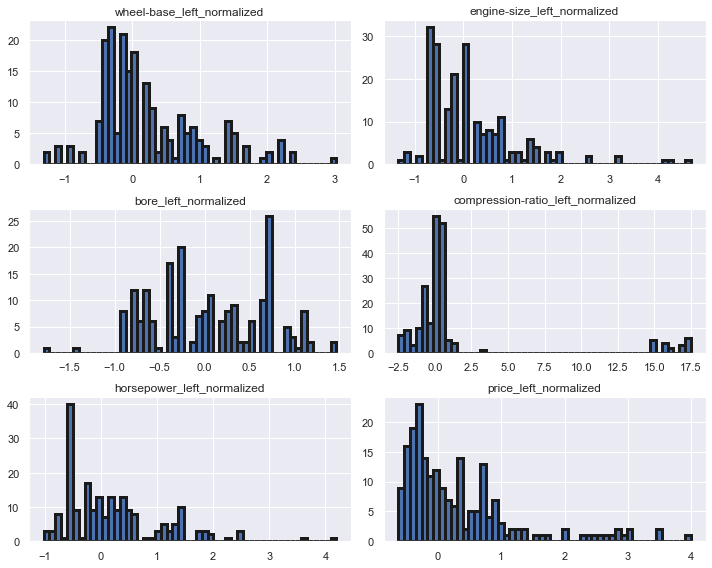

In [23]:
df_4[['wheel-base_left_normalized', 'engine-size_left_normalized',
       'bore_left_normalized', 'compression-ratio_left_normalized',
       'horsepower_left_normalized', 'price_left_normalized']].hist(figsize=(10,8),bins=50,color='b',linewidth='3',edgecolor='k')
plt.tight_layout()
plt.show()

The data isn't necessarily normalized, but the normalization scaled back the data to a certain scale.

# Regression model


<p> In this multiple regression model, we hope to use the car characteristics to predict price

In [24]:
df_4.columns = df_4.columns.str.replace("-", "_")
df_4.columns = df_4.columns.str.replace("_left", "")

In [25]:
df_4.head()

,symboling,normalized_losses,length,width,height,curb_weight,stroke,peak_rpm,city_mpg,highway_mpg,...,engine_location,engine_type,num_of_cylinders,fuel_system,wheel_base_normalized,engine_size_normalized,bore_normalized,compression_ratio_normalized,horsepower_normalized,price_normalized
0,3,NaN,168.80000,64.10000,48.80000,2548,2.68000,5000.00000,21,27,...,front,dohc,four,mpfi,-1.06329,0.22727,0.37209,0.00000,0.34783,0.33287
1,3,NaN,168.80000,64.10000,48.80000,2548,2.68000,5000.00000,21,27,...,front,dohc,four,mpfi,-1.06329,0.22727,0.37209,0.00000,0.34783,0.67780
2,1,NaN,171.20000,65.50000,52.40000,2823,3.47000,5000.00000,19,26,...,front,ohcv,six,mpfi,-0.31646,0.72727,-1.46512,0.00000,1.28261,0.67780
3,2,164,176.60000,66.20000,54.30000,2337,3.40000,5500.00000,24,30,...,front,ohc,four,mpfi,0.35443,-0.25000,-0.27907,1.25000,0.15217,0.38510
4,2,164,176.60000,66.40000,54.30000,2824,3.40000,5500.00000,18,22,...,front,ohc,five,mpfi,0.30380,0.36364,-0.27907,-1.25000,0.43478,0.78685


In [26]:
df_4.dtypes

symboling                         int64
normalized_losses                object
length                          float64
width                           float64
height                          float64
curb_weight                       int64
stroke                          float64
peak_rpm                        float64
city_mpg                          int64
highway_mpg                       int64
make                             object
fuel_type                        object
aspiration                       object
num_of_doors                     object
body_style                       object
drive_wheels                     object
engine_location                  object
engine_type                      object
num_of_cylinders                 object
fuel_system                      object
wheel_base_normalized           float64
engine_size_normalized          float64
bore_normalized                 float64
compression_ratio_normalized    float64
horsepower_normalized           float64


# MODEL 1

In [27]:
df_4.rcorr(method='spearman', padjust='holm')

,symboling,length,width,height,curb_weight,stroke,peak_rpm,city_mpg,highway_mpg,wheel_base_normalized,engine_size_normalized,bore_normalized,compression_ratio_normalized,horsepower_normalized,price_normalized
symboling,-,***,*,***,**,,**,,,***,,,,,
length,-0.396,-,***,***,***,,**,***,***,***,***,***,,***,***
width,-0.254,0.888,-,***,***,*,,***,***,***,***,***,,***,***
height,-0.523,0.525,0.35,-,***,,***,,,***,,,,,*
curb_weight,-0.256,0.89,0.864,0.346,-,,*,***,***,***,***,***,,***,***
stroke,-0.019,0.187,0.24,-0.018,0.163,-,,,,*,**,,,,
peak_rpm,0.282,-0.269,-0.199,-0.297,-0.236,-0.073,-,,,***,**,***,,,
city_mpg,-0.018,-0.67,-0.688,-0.069,-0.813,-0.03,-0.131,-,***,***,***,***,***,***,***
highway_mpg,0.053,-0.698,-0.701,-0.133,-0.834,-0.03,-0.057,0.968,-,***,***,***,***,***,***
wheel_base_normalized,-0.538,0.912,0.812,0.633,0.765,0.227,-0.312,-0.493,-0.539,-,***,***,,***,***


In [28]:
lm = smf.ols(formula='price_normalized~city_mpg+horsepower_normalized+engine_size_normalized+curb_weight+highway_mpg+height+width+length+wheel_base_normalized+bore_normalized',data=df_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       price_normalized   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     69.20
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.59e-58
Time:                        15:34:18   Log-Likelihood:                -113.83
No. Observations:                 205   AIC:                             249.7
Df Residuals:                     194   BIC:                             286.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2

# Backward Propagation

In [29]:
lm = smf.ols(formula='price_normalized~horsepower_normalized+engine_size_normalized+curb_weight+highway_mpg+height+width+length+wheel_base_normalized+bore_normalized',data=df_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       price_normalized   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     77.28
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.76e-59
Time:                        15:34:22   Log-Likelihood:                -113.83
No. Observations:                 205   AIC:                             247.7
Df Residuals:                     195   BIC:                             280.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2

In [30]:
lm = smf.ols(formula='price_normalized~horsepower_normalized+engine_size_normalized+curb_weight+highway_mpg+height+width+wheel_base_normalized+bore_normalized',data=df_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       price_normalized   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     87.25
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.05e-60
Time:                        15:34:22   Log-Likelihood:                -113.96
No. Observations:                 205   AIC:                             245.9
Df Residuals:                     196   BIC:                             275.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2

In [31]:
lm = smf.ols(formula='price_normalized~horsepower_normalized+engine_size_normalized+curb_weight+highway_mpg+height+width+bore_normalized',data=df_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       price_normalized   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     100.2
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           2.07e-61
Time:                        15:35:16   Log-Likelihood:                -114.01
No. Observations:                 205   AIC:                             244.0
Df Residuals:                     197   BIC:                             270.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3

In [32]:
lm = smf.ols(formula='price_normalized~horsepower_normalized+engine_size_normalized+curb_weight+height+width+bore_normalized',data=df_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       price_normalized   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     116.6
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           3.26e-62
Time:                        15:35:16   Log-Likelihood:                -114.61
No. Observations:                 205   AIC:                             243.2
Df Residuals:                     198   BIC:                             266.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3

In [33]:
lm = smf.ols(formula='price_normalized~horsepower_normalized+engine_size_normalized+curb_weight+width+bore_normalized',data=df_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       price_normalized   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     139.6
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           4.53e-63
Time:                        22:41:05   Log-Likelihood:                -115.18
No. Observations:                 205   AIC:                             242.4
Df Residuals:                     199   BIC:                             262.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3

In [34]:
lm = smf.ols(formula='price_normalized~horsepower_normalized+engine_size_normalized+curb_weight+width',data=df_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       price_normalized   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     174.0
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           5.80e-64
Time:                        22:41:06   Log-Likelihood:                -115.79
No. Observations:                 205   AIC:                             241.6
Df Residuals:                     200   BIC:                             258.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2

In [35]:
lm = smf.ols(formula='price_normalized~horsepower_normalized+engine_size_normalized+curb_weight',data=df_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       price_normalized   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     231.2
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           6.77e-65
Time:                        22:41:08   Log-Likelihood:                -116.47
No. Observations:                 205   AIC:                             240.9
Df Residuals:                     201   BIC:                             254.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1